In [1]:
import numpy as np
from lib import diptrap
import matplotlib.pyplot as plt
import scipy.constants as scc

parameters calculus
$$
R = \frac{1}{4} n_{\text{MOT}} \bar{v} A P_{trap}
$$

In [2]:
T = 100 * 10**-6 # K
m = 1.41810133E-25 # kg
g = 9.8 # m/s^2

n_MOT = 2.5e16 # m^-3
v_mean = 0.1 # m/s
A = 3.9e-9 # m^2
P_trap = 0.1

In [3]:
R = (1/4) * n_MOT * v_mean * A * P_trap
R

243750.0

In [11]:
time = [-6,-2]
steps = 100
burst = 10**-time[-1]#0.0001#10**time[-1]-10**(time[-1]-5)

trunc = 300
R = 2.5e5# 7 # s-1
gamma = 2 # s^-1
beta = 10 # 0.1

v0 = np.zeros(trunc)
v0[0] = 1

my_trap_1 = diptrap.markov_chain_FORT(R=R, gamma=gamma, beta=beta, truncation_size=trunc, method="model_2")
my_trap_1.evolve(v0 = v0, time = time, steps = steps, burst_time=burst, scale="log")

#my_trap_2 = diptrap.markov_chain_FORT(R=R, gamma=gamma, beta=beta, truncation_size=trunc, method="model_2")
#my_trap_2.evolve(v0, time, steps, burst)

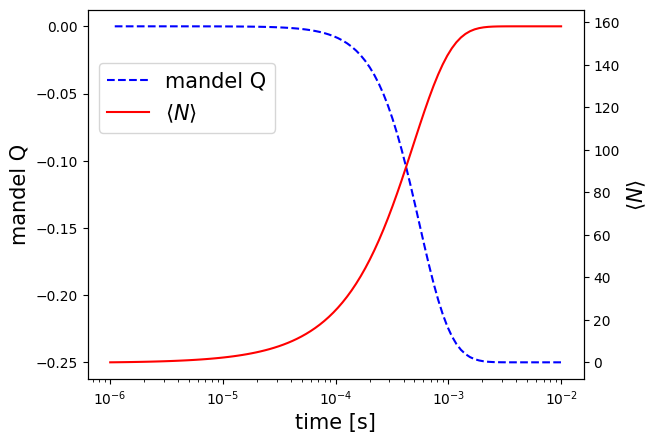

In [12]:
my_trap_1.plot_mandel_Q(scale="log")
#my_trap_2.plot_mandel_Q()

In [8]:
time = [-6,-3]
steps = 100
burst = 0.0001#10**time[-1]-10**(time[-1]-5)

trunc = 100
R = 2.5e5# 7 # s-1
gamma = 2 # s^-1
beta = 300 # 0.1

v0 = np.zeros(trunc)
v0[0] = 1

my_trap_1 = diptrap.markov_chain_FORT(R=R, gamma=gamma, beta=beta, truncation_size=trunc, method="model_2")
my_trap_1.evolve(v0 = v0, time = time, steps = steps, burst_time=burst, scale="log")

#my_trap_2 = diptrap.markov_chain_FORT(R=R, gamma=gamma, beta=beta, truncation_size=trunc, method="model_2")
#my_trap_2.evolve(v0, time, steps, burst)

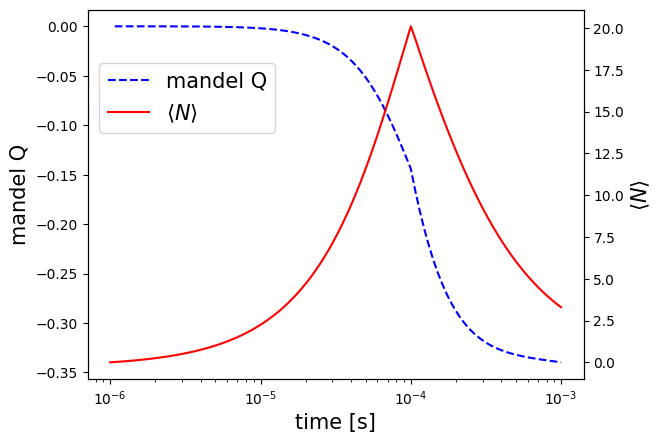

In [ ]:
my_trap_1.plot_mandel_Q(scale="log")
#my_trap_2.plot_mandel_Q()

mean =  12.62 +- 1.9482299658921172
Q =  -0.6992393026941364


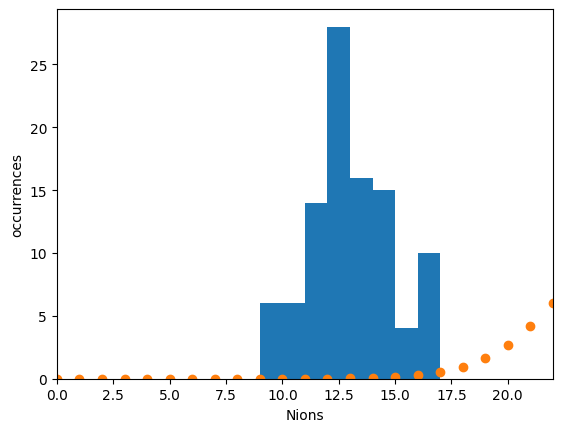

In [ ]:
name = "F-2022-12-21-0003.txt"

occurrences = []
data = open("data/2022-12-21/"+name, "r")

for row in data:
    row = row.replace("\n", "")
    row = row.replace(",", ".")
    terms = row.split("\t")
    occurrences.append(float(terms[2]))

mu = np.mean(occurrences)
std = np.std(occurrences)
x = np.arange(int(min(occurrences)), int(max(occurrences)))
#y = [poissonian(xx, mu)*len(occurrences) for xx in x]

print("mean = ", mu, "+-", std)
print("Q = ", std**2/mu-1)

#plt.plot(x+0.5, y, marker="o", linestyle="", label="ideal")
plt.hist(np.array(occurrences), bins=x, label="measured")
#plt.vlines(mu+0.5, 0, max(y)+1, color="gray", linestyle="--", label="mean")
#plt.legend()
plt.xlabel("Nions")
plt.ylabel("occurrences")

plt.plot(my_trap_1.evo.y[:,-1]*max(occurrences)/max(my_trap_1.evo.y[:,-1]), "o")
plt.xlim([0,22])
plt.show()